# 1/ Dataset

In [11]:
import pandas as pd

df = pd.read_csv('data/filtered_lyrics.csv', encoding='utf-8')
df.head()

,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",433
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",258
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,170
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",522
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [9]:
print(df.shape)

(148630, 7)


In [10]:
# Đếm số lần xuất hiện của từng giá trị trong cột 'genre'
genre_counts = df["genre"].value_counts()

# In ra số lượng từng thể loại
print(genre_counts)

# In ra tổng số thể loại khác nhau
print(f"📌 Tổng số thể loại trong cột 'genre': {genre_counts.shape[0]}")

genre
Rock       81612
Pop        28735
Hip-Hop    20355
Country    12334
Jazz        5594
Name: count, dtype: int64
📌 Tổng số thể loại trong cột 'genre': 5


In [11]:
# Danh sách các thể loại cần kiểm tra
genres = ["Rock", "Pop", "Hip-Hop", "Country", "Jazz"]


# Hàm kiểm tra thể loại nào có trong mỗi dòng
def check_multiple_genres(genre_text):
    if pd.isna(genre_text):  # Nếu giá trị NaN thì bỏ qua
        return []
    return [g for g in genres if g in genre_text]


# Áp dụng kiểm tra cho từng dòng
df["detected_genres"] = df["genre"].apply(check_multiple_genres)

# Lọc ra các dòng có nhiều hơn một thể loại
df_multiple_genres = df[df["detected_genres"].str.len() > 1]

# Hiển thị kết quả
print(f"📌 Số dòng có nhiều thể loại: {df_multiple_genres.shape[0]}")
print(df_multiple_genres[["genre", "detected_genres"]].head())

📌 Số dòng có nhiều thể loại: 0
Empty DataFrame
Columns: [genre, detected_genres]
Index: []


# 2/ Pre-processing

In [12]:
import os

# Số lượng bài hát cần lấy từ mỗi thể loại
num_songs = 5000
df = df.groupby("genre").head(num_songs)
path = "data/filtered_lyrics_5000_each_genre.csv"

# Lưu vào file mới
if os.path.exists(path):
    print(f"⚠️ File {path} đã tồn tại, sẽ ghi đè!")
else:
    print(f"✅ Tạo file mới: {path}")

df.to_csv(path, index=False, encoding="utf-8")
print(f"✅ File đã được ghi: {path}")

✅ Tạo file mới: data/filtered_lyrics_5000_each_genre.csv
✅ File đã được ghi: data/filtered_lyrics_5000_each_genre.csv


In [12]:
df = pd.read_csv("data/filtered_lyrics_5000_each_genre.csv", encoding='utf-8')
df.head()

,song,lyrics,genre,clean_lyrics
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...


In [14]:
# Kiểm tra lại số lượng bài hát mỗi thể loại sau khi lọc
print(df["genre"].value_counts())

genre
Pop        5000
Hip-Hop    5000
Rock       5000
Country    5000
Jazz       5000
Name: count, dtype: int64


In [15]:
# Thông tin chung (số dòng, kiểu dữ liệu, cột null)
print("\t 🔍 THÔNG TIN DỮ LIỆU:")
print(df.info())
print("-" * 50)

# Số lượng giá trị thiếu trong mỗi cột
print("\t ⚠️ GIÁ TRỊ THIẾU:")
print(df.isnull().sum())
print("-" * 50)

# Số dòng trùng lặp
print("\t 🔄 DỮ LIỆU TRÙNG LẶP:")
print(df.duplicated().sum())

	 🔍 THÔNG TIN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            25000 non-null  int64 
 1   song             25000 non-null  object
 2   year             25000 non-null  int64 
 3   artist           25000 non-null  object
 4   genre            25000 non-null  object
 5   lyrics           25000 non-null  object
 6   word_count       25000 non-null  int64 
 7   detected_genres  25000 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.5+ MB
None
--------------------------------------------------
	 ⚠️ GIÁ TRỊ THIẾU:
index              0
song               0
year               0
artist             0
genre              0
lyrics             0
word_count         0
detected_genres    0
dtype: int64
--------------------------------------------------
	 🔄 DỮ LIỆU TRÙNG LẶP:
0


In [16]:
# Keeping necessaries column data
columns_to_keep = ["song", "lyrics", "genre"]
df = df[columns_to_keep]

# In kết quả sau khi xử lý
print("\n" + "=" * 50)
print("📌 DỮ LIỆU SAU KHI GIỮ LẠI CỘT QUAN TRỌNG")
print("=" * 50)
df.head()


📌 DỮ LIỆU SAU KHI GIỮ LẠI CỘT QUAN TRỌNG


,song,lyrics,genre
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop
4,black-culture,"Party the people, the people the party it's po...",Pop


* Data pre-processing

In [7]:
def load_contractions(path_to_load):
    contractions_dict = {}
    with open(path_to_load, "r", encoding="utf-8") as file:
        for line in file:
            short, full = line.strip().split("=")
            contractions_dict[short] = full
    return contractions_dict


# Đọc từ file
CUSTOM_CONTRACTIONS = load_contractions("custom/custom_contractions.txt")

print(CUSTOM_CONTRACTIONS)

{"'til": 'until', "' til": 'until', "'till": 'until', "' till": 'until', '’til': 'until', '’ til': 'until', '’till': 'until', '’ till': 'until', "'round": 'around', "' round": 'around', '’round': 'around', '’ round': 'around', "'bout": 'about', "' bout": 'about', '’bout': 'about', '’ bout': 'about', "'cause": 'because', "' cause": 'because', '’cause': 'because', '’ cause': 'because', "gon'": 'going to', 'gonna': 'going to', 'wanna': 'want to', 'lemme': 'let me', 'gimme': 'give me', "ain't": 'is not', "y'all": 'you all', 'yall': 'you all', 'ya': 'you', 'cuz': 'because', 'coz': 'because', 'cus': 'because', 'hafta': 'have to', 'gotta': 'got to', 'outta': 'out of', 'dunno': 'do not know', 'kinda': 'kind of', 'sorta': 'sort of', 'woulda': 'would have', 'shoulda': 'should have', 'coulda': 'could have'}


In [8]:
import re


def load_remove(path_to_load):
    remove_list = set()
    with open(path_to_load, "r", encoding="utf-8") as file:
        for line in file:
            word = line.strip()
            if word:
                remove_list.add(re.escape(word))
    return remove_list


# Đọc từ file
CUSTOM_REMOVE = load_remove("custom/custom_remove.txt")

print(CUSTOM_REMOVE)

{'eh,', 'ooh\\?', 'eh', 'oh!', '\\-eh', 'oh\\?', ',hey', ',eh', 'ooh\\.', 'hey!', ',ooh', ',oh', 'hey\\-', ',uh', 'eh!', '\\-oh', 'eh\\?', 'hey', 'oh', 'uh\\.', 'ooh!', 'uh!', 'eh\\.', 'ooh,', 'uh\\-', '\\-ooh', 'eh\\-', 'hey\\?', 'ooh', 'uh,', 'hey\\.', '\\-hey', 'oh\\.', 'uh\\?', 'ooh\\-', 'uh', 'oh,', 'oh\\-', 'hey,', '\\-uh'}


In [9]:
import contractions
import spacy
import inflect

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Tạo engine để chuyển số thành chữ
p = inflect.engine()


# Remove stopwords with spaCy
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])


# Lemmatization with spaCy
def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])


# Preprocessing
def preprocess(text):
    if pd.isna(text):
        return ""

    lyrics_preprocess = text.lower().strip()

    lyrics_preprocess = re.sub(r'\d+', lambda x: p.number_to_words(x.group()), lyrics_preprocess)

    pattern = r"\b(" + "|".join(CUSTOM_REMOVE) + r")\b"
    lyrics_preprocess = re.sub(pattern, "", lyrics_preprocess, flags=re.IGNORECASE)

    lyrics_preprocess = lyrics_preprocess.replace("in'", "ing").replace("in '", "ing")
    lyrics_preprocess = lyrics_preprocess.replace("in’", "ing").replace("in ’", "ing")
    for short, full in CUSTOM_CONTRACTIONS.items():
        lyrics_preprocess = lyrics_preprocess.replace(short, full)

    lyrics_preprocess = contractions.fix(lyrics_preprocess)
    lyrics_preprocess = re.sub(r"[`’']", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"<.*?>", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"\[[0-9]*\]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"\b(chorus|verse)\b", "", lyrics_preprocess, flags=re.IGNORECASE)
    lyrics_preprocess = re.sub(r"[^\w\s]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"[,:?\[\]{}\-+\\/|@#$*^&%~!();\"]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"x[1-9]", "", lyrics_preprocess)
    lyrics_preprocess = re.sub(r"\s+", " ", lyrics_preprocess).strip()

    lyrics_preprocess = remove_stopwords(lyrics_preprocess)
    lyrics_preprocess = lemmatize(lyrics_preprocess)

    return lyrics_preprocess

In [20]:
# Chạy preprocessing và lưu vào CSV
print("🚀 Đang xử lý lyrics...")
df["clean_lyrics"] = df["lyrics"].apply(preprocess)
df.to_csv("data/filtered_lyrics_5000_each_genre.csv", index=False)

df.head()

🚀 Đang xử lý lyrics...


,song,lyrics,genre,clean_lyrics
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...


* Data Analysis

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def data_analysis(df_analysis):
    # Lấy danh sách tất cả thể loại (distinct)
    all_genres_list = df_analysis["genre"].dropna().unique()

    # Danh sách lưu dữ liệu để vẽ biểu đồ
    average_word_list = []
    unique_word_list = []
    genre_list = []

    with open("out.txt", "w") as f:
        for genre in all_genres_list:
            genre_list.append(genre)

            # Lọc dữ liệu theo thể loại
            subset_df = df_analysis[df_analysis["genre"] == genre]

            # Số lượng bài hát trong thể loại
            number_of_songs = len(subset_df)
            if number_of_songs == 0:
                continue  # Bỏ qua nếu không có bài hát

            # Tách lyrics thành từ
            all_words = subset_df["lyrics"].dropna().str.split().explode()

            # Đếm số từ và số từ duy nhất
            word_counts = all_words.value_counts()
            total_no_of_words = word_counts.sum()
            total_unique_words = len(word_counts)

            # Tính số từ trung bình và số từ duy nhất trung bình
            average_words = total_no_of_words / number_of_songs if number_of_songs > 0 else 0
            average_unique_words = total_unique_words / number_of_songs if number_of_songs > 0 else 0

            # Lấy 10 từ phổ biến nhất
            top_ten_wordcount = word_counts.head(10)

            # Lưu dữ liệu để vẽ biểu đồ
            average_word_list.append(average_words)
            unique_word_list.append(average_unique_words)

            # Ghi dữ liệu vào file
            f.write(f"For genre {genre}\n")
            f.write(f"Total number of songs: {number_of_songs}\n")
            f.write(f"Total words in the genre: {total_no_of_words}\n")
            f.write(f"Average number of words per song: {average_words:.2f}\n")
            f.write(f"Average number of unique words per song: {average_unique_words:.2f}\n")
            f.write(f"Top ten most frequent words: {list(top_ten_wordcount.index)}\n")
            f.write("-" * 50 + "\n")

            # 📌 Vẽ Word Cloud cho từng thể loại
            text = " ".join(subset_df["lyrics"].dropna())  # Gộp tất cả lyrics lại
            wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

            # Hiển thị Word Cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")  # Tắt trục
            plt.title(f"Word Cloud for {genre}", fontsize=14)
            plt.show()

    # 📌 Vẽ biểu đồ số từ trung bình
    y_pos = np.arange(len(genre_list))

    plt.figure(figsize=(12, 6))
    plt.bar(y_pos, average_word_list, alpha=0.7, color='blue')
    plt.xticks(y_pos, genre_list, rotation=45)
    plt.ylabel('Average number of words per song')
    plt.title('Average Words by Genre')
    plt.show()

    # 📌 Vẽ biểu đồ số từ duy nhất trung bình
    plt.figure(figsize=(12, 6))
    plt.bar(y_pos, unique_word_list, alpha=0.7, color='green')
    plt.xticks(y_pos, genre_list, rotation=45)
    plt.ylabel('Unique words per song')
    plt.title('Unique Words by Genre')
    plt.show()

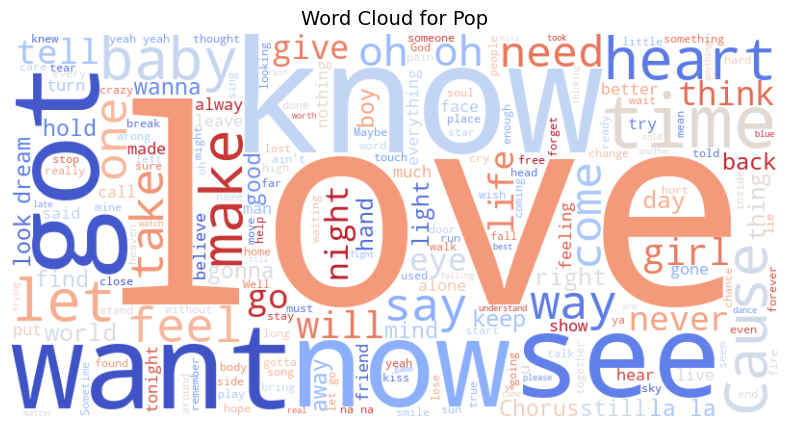

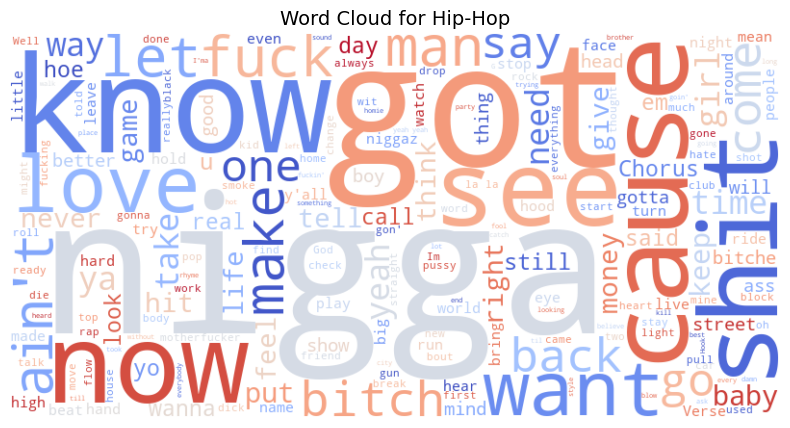

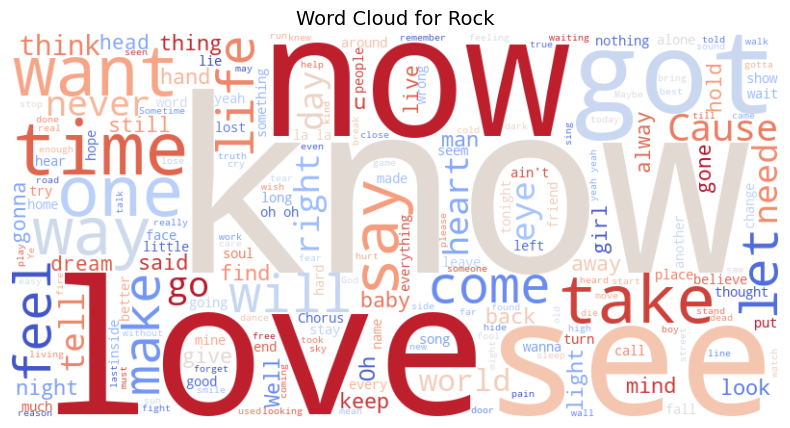

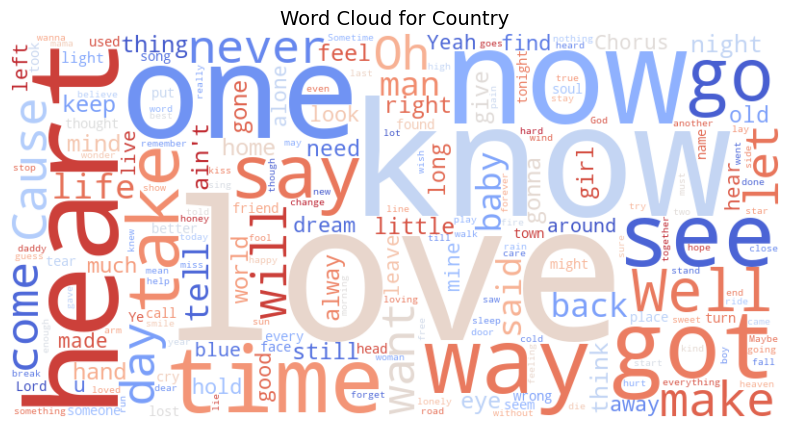

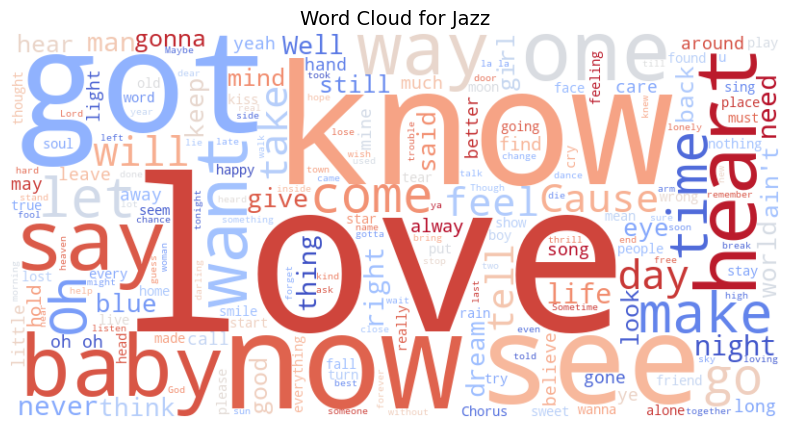

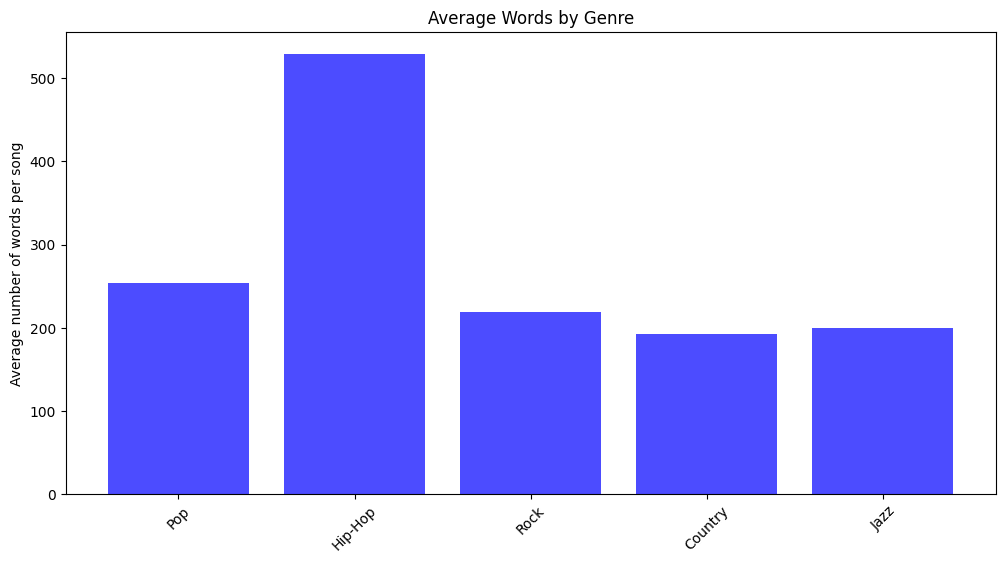

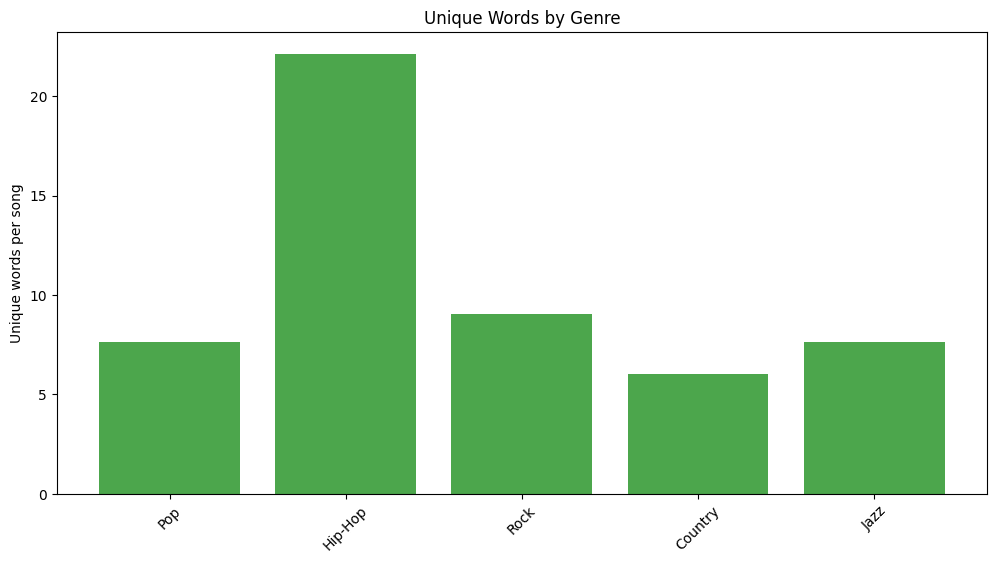

In [22]:
data_analysis(df)

# 3/ Train the model

In [13]:
df_train = df
df_train.head(10)

,song,lyrics,genre,clean_lyrics
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...
5,all-i-could-do-was-cry,I heard\nChurch bells ringing\nI heard\nA choi...,Pop,hear church bell ring hear choir singing see l...
6,once-in-a-lifetime,This is just another day that I would spend\nW...,Pop,day spend wait right stare night wish feel war...
7,slow-love,[Verse 1:]\nI read all of the magazines\nwhile...,Pop,read magazine waiting say wait get stuck town ...
8,why-don-t-you-love-me,"N-n-now, honey\nYou better sit down and look a...",Pop,nnnow honey well sit look bump yo head love ta...
9,save-the-hero,I lay alone awake at night\nSorrow fills my ey...,Pop,lie awake night sorrow fill eye strong cry des...


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train["clean_lyrics"], df_train['genre'],
                                                    test_size=0.2, shuffle=True, random_state=42)

## TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_vectors_tfidf = vectorizer_tfidf.transform(X_test)

## Models

In [18]:
from sklearn.metrics import classification_report


def evaluate_model(model_applied, X_train_evaluate, y_train_evaluate, X_test_evaluate, y_test_evaluate):
    model_applied.fit(X_train_evaluate, y_train_evaluate)
    y_pred = model_applied.predict(X_test_evaluate)
    print(classification_report(y_test_evaluate, y_pred))

In [19]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [30]:
# # Định nghĩa tập giá trị hyperparameter cần tối ưu
# param_grid_lr = {
#     "estimator__C": [0.01, 0.1, 1, 10],
#     "estimator__solver": ["saga", "lbfgs"],
#     "estimator__penalty": ["l2"],
#     "estimator__max_iter": [500, 1000],
# }
#
# # Dùng OneVsRest vì có nhiều class
# base_lr = OneVsRestClassifier(LogisticRegression())
#
# # GridSearchCV để tìm tham số tốt nhất
# grid_lr = GridSearchCV(base_lr, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid_lr.fit(X_train_vectors_tfidf, y_train)
#
# # Lấy tham số tốt nhất
# best_params_lr = grid_lr.best_params_
# print("🔍 Best Parameters for Logistic Regression:", best_params_lr)

In [127]:
# Huấn luyện lại mô hình với tham số tối ưu
best_lr = OneVsRestClassifier(LogisticRegression(C=10, max_iter=500, penalty='l2', solver='saga', random_state=43))
best_lr.fit(X_train_vectors_tfidf, y_train)

# Đánh giá mô hình
print("=== Logistic Regression ===")
evaluate_model(best_lr, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf, y_test)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.59      0.62      0.60      1017
           1       0.88      0.84      0.86       999
           2       0.59      0.56      0.58       996
           3       0.47      0.47      0.47       978
           4       0.49      0.51      0.50      1010

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



### Naive Bayes

* Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]}

grid_nb = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_nb.fit(X_train_vectors_tfidf, y_train)

best_params_nb = grid_nb.best_params_
print("🎯 Best Parameters for Naive Bayes:", best_params_nb)

🎯 Best Parameters for Naive Bayes: {'alpha': 0.1}


In [42]:
# Huấn luyện mô hình với tham số tối ưu
nb_tfidf = MultinomialNB(**best_params_nb)
nb_tfidf.fit(X_train_vectors_tfidf, y_train)

# Đánh giá mô hình
print("=== Naive Bayes ===")
evaluate_model(nb_tfidf, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf, y_test)

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.56      0.68      0.61      1017
           1       0.81      0.84      0.82       999
           2       0.67      0.49      0.56       996
           3       0.44      0.50      0.47       978
           4       0.53      0.48      0.51      1010

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# # Định nghĩa tập giá trị hyperparameter cần tìm kiếm
# param_grid_dt = {
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [2, 5, 10],
#     'max_features': ['sqrt', 'log2', None],
#     'criterion': ['gini', 'entropy']
# }
#
# # Tạo GridSearchCV cho Decision Tree
# grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
# grid_dt.fit(X_train_vectors_tfidf, y_train)
#
# # Lấy tham số tối ưu
# best_params_dt = grid_dt.best_params_
# print("🌳 Best Parameters for Decision Tree:", best_params_dt)

In [44]:
# Huấn luyện mô hình với tham số tối ưu
dt_tfidf = DecisionTreeClassifier(
    max_depth=None,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini',
    random_state=45
)
dt_tfidf.fit(X_train_vectors_tfidf, y_train)

# Đánh giá mô hình
print("=== Decision Tree ===")
evaluate_model(dt_tfidf, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf, y_test)

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.44      0.45      0.44      1017
           1       0.79      0.77      0.78       999
           2       0.42      0.44      0.43       996
           3       0.37      0.38      0.38       978
           4       0.40      0.36      0.38      1010

    accuracy                           0.48      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.48      0.48      0.48      5000



### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# # Định nghĩa tập giá trị hyperparameter
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [2, 5, 10],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy']
# }
#
# # Tạo GridSearchCV cho Random Forest
# grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_rf.fit(X_train_vectors_tfidf, y_train)
#
# # Lấy tham số tối ưu
# best_params_rf = grid_rf.best_params_
# print("🌲 Best Parameters for Random Forest:", best_params_rf)

In [49]:
# Huấn luyện mô hình với tham số tối ưu
rf_tfidf = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=20,
    n_estimators=400,
    criterion='gini',
    random_state=46
)
rf_tfidf.fit(X_train_vectors_tfidf, y_train)

# Đánh giá mô hình
print("=== Random Forest ===")
evaluate_model(rf_tfidf, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf, y_test)

=== Random Forest ===
              precision    recall  f1-score   support

     Country       0.60      0.67      0.63      1017
     Hip-Hop       0.85      0.88      0.87       999
        Jazz       0.70      0.53      0.60       996
         Pop       0.50      0.52      0.51       978
        Rock       0.52      0.53      0.52      1010

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



### SVM

In [48]:
from sklearn.svm import SVC

In [49]:
# # Định nghĩa tập giá trị hyperparameter
# param_grid_svm = [
#     {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
#     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]},
#     {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10], 'degree': [0, 1, 2, 3, 4]}
# ]
#
# # GridSearchCV
# grid_search_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
# grid_search_svm.fit(X_train_vectors_tfidf, y_train)
#
# # In ra tham số tốt nhất
# print(f'The best parameter is {grid_search_svm.best_params_}')

In [50]:
# Huấn luyện mô hình với tham số tối ưu
svm_tfidf = SVC(C=1, gamma=1, kernel='rbf', random_state=47)
svm_tfidf.fit(X_train_vectors_tfidf, y_train)

print("=== SVM ===")
evaluate_model(svm_tfidf, X_train_vectors_tfidf, y_train, X_test_vectors_tfidf, y_test)

=== SVM ===
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1017
           1       0.91      0.80      0.85       999
           2       0.63      0.57      0.60       996
           3       0.48      0.50      0.49       978
           4       0.49      0.57      0.53      1010

    accuracy                           0.61      5000
   macro avg       0.62      0.61      0.62      5000
weighted avg       0.62      0.61      0.62      5000



# 4/ Testing

In [50]:
from collections import defaultdict
from lingua import Language, LanguageDetectorBuilder


def detect_languages(text, detector):
    """Phát hiện ngôn ngữ và xác suất của đoạn văn bản."""
    if isinstance(text, str) and text.strip():
        confidences = detector.compute_language_confidence_values(text)
        return {lang.language.name: lang.value for lang in confidences}
    return {}


def detect_languages_for_lyrics(lyrics_languages):
    languages = [
        Language.ENGLISH, Language.VIETNAMESE, Language.KOREAN, Language.CHINESE, Language.JAPANESE, Language.FRENCH,
        Language.GERMAN, Language.SPANISH, Language.ITALIAN, Language.RUSSIAN, Language.PORTUGUESE, Language.POLISH,
    ]

    detector = LanguageDetectorBuilder.from_languages(*languages).build()

    text = lyrics_languages.strip()
    segments = [line for line in text.splitlines() if line.strip()]

    if not segments:
        return {"detected_languages": "Unknown", "multilingual": "Unknown"}

    language_totals = defaultdict(float)
    segment_count = len(segments)

    for segment in segments:
        detected_languages = detect_languages(segment, detector)
        for lang, value in detected_languages.items():
            if lang != "UNKNOWN":
                language_totals[lang] += value

    if not language_totals:
        return {"detected_languages": "Unknown", "multilingual": "Unknown"}

    # Calculate the average confidence percentages
    average_languages = {lang: round(value / segment_count * 100, 2) for lang, value in language_totals.items()}

    # Check if text is multilingual (if any language has > 20% confidence)
    multilingual = any(
        lang in {"VIETNAMESE", "KOREAN", "CHINESE", "JAPANESE", "FRENCH", "GERMAN", "SPANISH", "ITALIAN", "RUSSIAN",
                 "PORTUGUESE", "POLISH"} and value > 20
        for lang, value in average_languages.items()
    )

    return {
        "detected_languages": average_languages,
        "multilingual": "Yes" if multilingual else "No"
    }

In [51]:
def preprocess_lyrics(text, multilingual):
    if multilingual == "No":
        lyrics_test = preprocess(text)
        return lyrics_test
    return "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ."

In [52]:
def tfidf_lyrics(test_lyrics):
    """
        Chuyển đổi lyrics thành vector TF-IDF.
    """
    if not test_lyrics:
        print("🚫 Không có lyrics.")
        return None

    lyrics_data = detect_languages_for_lyrics(test_lyrics)
    preprocessed_lyrics = preprocess_lyrics(test_lyrics, lyrics_data["multilingual"])

    if preprocessed_lyrics != "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ.":
        # Biến lyrics thành vector TF-IDF
        remix_song_tfidf = vectorizer_tfidf.transform([preprocessed_lyrics])
        return remix_song_tfidf

    return "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ."

In [54]:
df_cosine_similarity = df
documents = df_cosine_similarity["clean_lyrics"]
vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix = vectorizer.fit_transform(documents)

print("🌟 Từ vựng:", vectorizer.vocabulary_)
print("\n📝 Ma trận TF-IDF:\n", tfidf_matrix.toarray())

🌟 Từ vựng: {'baby': 3401, 'know': 30242, 'going': 22792, 'cut': 12746, 'right': 45863, 'chase': 9233, 'woman': 61646, 'like': 31709, 'think': 55266, 'create': 12218, 'special': 51495, 'purpose': 43604, 'feel': 19113, 'let': 31422, 'lose': 32420, 'need': 37040, 'work': 61840, 'boss': 6423, 'real': 44472, 'want': 60110, 'consider': 11382, 'lucky': 32713, 'big': 5106, 'deal': 13411, 'get': 22127, 'key': 29780, 'heart': 24806, 'aingt': 1036, 'go': 22674, 'open': 39208, 'body': 6021, 'secret': 48008, 'inside': 27830, 'lie': 31577, 'wide': 61205, 'strong': 52884, 'fit': 19746, 'tough': 56474, 'talk': 54191, 'ego': 16915, 'huge': 26502, 'love': 32515, 'walk': 60013, 'usually': 58993, 'humble': 26554, 'choose': 9772, 'leave': 31204, 'blue': 5867, 'arrogant': 2522, 'confident': 11241, 'decide': 13532, 'find': 19579, 'damn': 13013, 'kill': 29928, 'leg': 31271, 'well': 60597, 'thigh': 55234, 'matter': 33901, 'fact': 18615, 'smile': 50625, 'maybe': 33973, 'eye': 18485, 'boy': 6577, 'site': 49896, 

In [55]:
df_cosine_similarity.head(10)

,song,lyrics,genre,clean_lyrics
0,ego-remix,"Oh baby, how you doing?\nYou know I'm gonna cu...",Pop,baby know going cut right chase woman like thi...
1,then-tell-me,"playin' everything so easy,\nit's like you see...",Pop,play easy like sure way sure thing come right ...
2,honesty,If you search\nFor tenderness\nIt isn't hard t...,Pop,search tenderness hard find love need live loo...
3,you-are-my-rock,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",Pop,write book stand title book life superman feel...
4,black-culture,"Party the people, the people the party it's po...",Pop,party people people party pop sit look look lo...
5,all-i-could-do-was-cry,I heard\nChurch bells ringing\nI heard\nA choi...,Pop,hear church bell ring hear choir singing see l...
6,once-in-a-lifetime,This is just another day that I would spend\nW...,Pop,day spend wait right stare night wish feel war...
7,slow-love,[Verse 1:]\nI read all of the magazines\nwhile...,Pop,read magazine waiting say wait get stuck town ...
8,why-don-t-you-love-me,"N-n-now, honey\nYou better sit down and look a...",Pop,nnnow honey well sit look bump yo head love ta...
9,save-the-hero,I lay alone awake at night\nSorrow fills my ey...,Pop,lie awake night sorrow fill eye strong cry des...


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_lyrics_with_tf_idf(lyrics_testing):
    if not lyrics_testing:
        print("🚫 Không thể so sánh do lỗi khi trích xuất lyrics.")
        return

    lyrics_data = detect_languages_for_lyrics(lyrics_testing)
    preprocessed_lyrics = preprocess_lyrics(lyrics_testing, lyrics_data["multilingual"])

    if preprocessed_lyrics != "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ.":
        vector = vectorizer.transform([preprocessed_lyrics])

        similarity_scores = cosine_similarity(vector, tfidf_matrix)[0]

        df_sim_whisper = pd.DataFrame({
            "Song": df_cosine_similarity["song"].values,
            "Lyrics": df_cosine_similarity["clean_lyrics"].values,
            "Similarity": similarity_scores
        })
        df_sim_whisper = df_sim_whisper.sort_values(by="Similarity", ascending=False)

        return df_sim_whisper.head(5)
    return "Không hợp lệ: Văn bản chứa nhiều ngôn ngữ."

In [53]:
# Hàm dự đoán thể loại của bài hát
def predict_genre(model_prediction, tfidf_vector):
    # Dự đoán thể loại
    predicted_genre = model_prediction.predict(tfidf_vector)[0]

    return predicted_genre

In [58]:
import whisper


def transcribe_lyric_by_whisper(audio_path):
    """Dùng Whisper để trích xuất lyric từ file nhạc"""
    try:
        print("Đang chuyển đổi audio thành text bằng Whisper...")
        model_to_load = whisper.load_model("large")
        result = model_to_load.transcribe(audio_path, fp16=False)
        lyrics_transcribe = result["text"]

        print("🎤 Lời bài hát được trích xuất thành công!")
        return lyrics_transcribe
    except Exception as e:
        print(f"❌ Lỗi khi trích xuất lời bài hát: {e}")
        return None

In [59]:
import subprocess


def separate_vocals(input_file, output_folder="demucs_output"):
    """Chạy Demucs để tách giọng hát từ file MP3 và đổi tên file kết quả."""

    # Kiểm tra file đầu vào có tồn tại không
    if not os.path.exists(input_file):
        print(f"❌ Lỗi: File đầu vào '{input_file}' không tồn tại!")
        return None

    try:
        # Tạo thư mục output nếu chưa tồn tại
        os.makedirs(output_folder, exist_ok=True)

        filename = os.path.splitext(os.path.basename(input_file))[0]
        vocals_dir = os.path.join(output_folder, "mdx_extra_q", filename)
        vocals_path = os.path.join(vocals_dir, "vocals.mp3")
        new_vocals_path = os.path.join(vocals_dir, f"{filename}_vocals.mp3")

        if os.path.exists(new_vocals_path):
            print(f"✅ File vocals đã tồn tại: {new_vocals_path}")
            return new_vocals_path

        # Chạy Demucs để tách giọng hát
        command = [
            "demucs", "-o", output_folder, "--mp3",
            "-n", "mdx_extra_q", input_file
        ]
        subprocess.run(command, check=True)

        print(f"✅ Tách giọng hát thành công! Kết quả lưu tại: {output_folder}")

        # Kiểm tra file vocals.mp3 có được tạo ra không
        if not os.path.exists(vocals_path):
            print(f"❌ Lỗi: File vocals.mp3 không tồn tại trong thư mục {vocals_dir}")
            return None

        # Đổi tên file
        os.rename(vocals_path, new_vocals_path)
        print(f"✅ Đã đổi tên file thành: {new_vocals_path}")

        return new_vocals_path

    except subprocess.CalledProcessError as e:
        print(f"❌ Lỗi khi chạy Demucs: {e}")
        return None

In [60]:
def slow_down_audio_ffmpeg(input_file, output_folder="final_output", speed_factor=0.85):
    """Làm chậm audio bằng FFmpeg và loại bỏ khoảng lặng"""
    try:
        # Tách tên file không có phần mở rộng
        filename = os.path.splitext(os.path.basename(input_file))[0]

        # Tạo thư mục output nếu chưa tồn tại
        os.makedirs(output_folder, exist_ok=True)

        # Tạo đường dẫn cho file đã làm chậm
        slowed_audio = os.path.join(output_folder, f"{filename}_slowdown.wav")

        # Lệnh FFmpeg làm chậm audio
        command = [
            "ffmpeg", "-i", input_file,
            "-filter:a", f"atempo={speed_factor}", "-vn",
            "-y", slowed_audio  # Ghi đè file nếu đã tồn tại
        ]
        subprocess.run(command, check=True)

        # Gọi hàm remove_silence để xử lý file đã làm chậm
        final_output = os.path.join(output_folder, f"{filename}_final.wav")
        result = remove_silence(slowed_audio, final_output)

        if os.path.exists(slowed_audio):
            os.remove(slowed_audio)

        return result
    except subprocess.CalledProcessError as e:
        print(f"❌ Lỗi khi chạy FFmpeg: {e}")
        return None


def remove_silence(input_audio, output_audio, silence_threshold="-40dB", min_silence_duration="0.5"):
    """Loại bỏ khoảng lặng trong file audio bằng FFmpeg"""
    try:
        command = [
            "ffmpeg",
            "-i", input_audio,
            "-af",
            f"silenceremove=stop_periods=-1:stop_duration={min_silence_duration}:stop_threshold={silence_threshold}",
            "-y",
            output_audio
        ]
        subprocess.run(command, check=True)
        return output_audio
    except subprocess.CalledProcessError as e:
        print(f"❌ Lỗi khi loại bỏ khoảng lặng: {e}")
        return None

## Cosine Similarity

In [61]:
lyrics_similarity = """
Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is fallin' too
I'm in love with your body
And last night, you were in my room
And now my bed sheets smell like you
Every day, discoverin' somethin' brand new
Well, I'm in love with your body

Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you

One week in, we let the story begin
We're goin' out on our first date (Mm)
You and me are thrifty, so go all-you-can-eat
Fill up your bag and I fill up a plate (Mm)
We talk for hours and hours about the sweet and the sour
And how your family is doin' okay (Mm)
And leave and get in a taxi, and kiss in the back seat
Tell the driver make the radio play and I'm singin' like

Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you
"""
lyrics_similarity_1 = """
    Days like this don't get much better
    Top down, good fam, good weather
    Days like this, we don't miss, never
    Yeah, yeah
    Last night, things got a little bit crazy
    Pulled up doin' 'bout 180
    Life goes fast, so there ain't no maybes
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me them stars out, four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road

    Wastin' time ain't overrated
    Not when you're celebrated
    Raise that glass, we're all here waitin'
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me that truck, that four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it up high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
"""
lyrics_similarity_2 = """
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
So what you trying to do to me
It's like we can't stop, we're enemies
But we get along when I'm inside you, eh
You're like a drug that's killing me
I cut you out entirely
But I get so high when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
So if I run it's not enough
You're still in my head forever stuck
So you can do what you wanna do, eh
I love your lies I'll eat 'em up
But don't deny the animal
That comes alive when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no girl don't lie)
You can't deny, ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
Yo
Whoa
Whoa
Just like animals
Animals
Like animals-mals
Just like animals (yeah)
Animals (yeah)
Like animals-mals (yeah)
Ow
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no, girl don't lie)
You can't deny-ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
"""
lyrics_similarity_3 = """
Your morning eyes, I could stare like watching stars
I could walk you by, and I'll tell without a thought
You'd be mine, would you mind if I took your hand tonight?
Know you're all that I want this life

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?

My love will always stay by you
I'll keep it safe, so don't you worry a thing
I'll tell you I love you more
It's stuck with you forever, so promise you won't let it go
I'll trust the universe will always bring me to you

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?
"""

In [62]:
find_similar_lyrics_with_tf_idf(lyrics_similarity)

,Song,Lyrics,Similarity
21921,come-back-to-me,dolly parton come come love come need baby com...,0.417780
14028,i-like-your-sexy-body,little girl want tell secret mm like sexy body...,0.409769
14343,body-to-body-remix,yeah ace hood baby good huh thing mind ha ha h...,0.397872
14336,body-2-body,yeah ace hood baby good huh thing mind ha ha h...,0.397872
14360,body-2-body-remix,yeah ace hood baby good huh thing mind ha ha h...,0.397872


In [63]:
find_similar_lyrics_with_tf_idf(lyrics_similarity_1)

,Song,Lyrics,Similarity
3782,run-run-run,girl gather hear news finally kiss happy day h...,0.625436
5812,turn-run,hear life pass sound like kick time look stake...,0.534156
167,runnin-lose-it-all,beyoncã lonely wall change way feel way feel s...,0.501643
7392,running-out,thinking day meet love came rush hand fill reg...,0.499733
5771,left-my-baby-for-you,wake need face take space want run run run run...,0.457803


In [64]:
find_similar_lyrics_with_tf_idf(lyrics_similarity_2)

,Song,Lyrics,Similarity
3400,animal-ambition,get animal animal ambition get animal animal a...,0.597334
2495,talk-to-the-animals,talk animal imagine chat chimp chimpanzee imag...,0.488557
6450,would-i-lie-to-you,love baby hm hoo look eye lie baby lie look ey...,0.332942
7152,the-animal,live life hard bear thing chenge bit lightness...,0.302507
8887,9-to-5,punch clock baby aingt time tic toc want love ...,0.260572


In [65]:
find_similar_lyrics_with_tf_idf(lyrics_similarity_3)

,Song,Lyrics,Similarity
5668,forever-luv,forever love forever love forever love forever...,0.317522
16832,colorshow,loud let color try madness low hear wrong come...,0.301913
1080,always-and-forever,give love need thankyou love forever know fore...,0.301794
11395,forever-love,forever love forever love forever love forever...,0.297516
1130,white-flags,light dim window crack twist cap bottle sip hi...,0.279412


In [66]:
lyrics_test_case = """
He talk like this 'cause he can back it up
He got a big ego, such a huge ego, such a huge ego
I love his big ego, it's too much
He walk like this 'cause he can back it up
Ego so big, you must admit
I got every reason to feel like I'm that bitch
Ego so strong, if you ain't know
I don't need no beat, I can sing it with piano
"""
find_similar_lyrics_with_tf_idf(lyrics_test_case)

,Song,Lyrics,Similarity
0,ego-remix,baby know going cut right chase woman like thi...,0.887439
9044,ego-war,urban ego war urban suburban ego war ego war s...,0.567664
17006,come-on-yeah,friend funky beat hold go friend sound tough e...,0.488853
16964,ego-trippin-part-two,bug e ghostbuster mercy mercy ego trip ego tri...,0.430005
17044,ego-trippin,bug e ghostbuster mercy mercy ego trip ego tri...,0.430005


## Genre Classification

### a - Provides Lyrics

In [54]:
lyrics = """
Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is fallin' too
I'm in love with your body
And last night, you were in my room
And now my bed sheets smell like you
Every day, discoverin' somethin' brand new
Well, I'm in love with your body

Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Oh, I, oh, I, oh, I, oh, I
Well, I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you

One week in, we let the story begin
We're goin' out on our first date (Mm)
You and me are thrifty, so go all-you-can-eat
Fill up your bag and I fill up a plate (Mm)
We talk for hours and hours about the sweet and the sour
And how your family is doin' okay (Mm)
And leave and get in a taxi, and kiss in the back seat
Tell the driver make the radio play and I'm singin' like

Girl, you know I want your love
Your love was handmade for somebody like me
Well, come on now, follow my lead
I may be crazy, don't mind me
Say, "Boy, let's not talk too much"
Grab on my waist and put that body on me
Well, come on now, follow my lead
Come, come on now, follow my lead, mm

Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with your body
Every day, discoverin' somethin' brand new
I'm in love with the shape of you
"""
lyrics_1 = """
    Days like this don't get much better
    Top down, good fam, good weather
    Days like this, we don't miss, never
    Yeah, yeah
    Last night, things got a little bit crazy
    Pulled up doin' 'bout 180
    Life goes fast, so there ain't no maybes
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me them stars out, four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road

    Wastin' time ain't overrated
    Not when you're celebrated
    Raise that glass, we're all here waitin'
    Yeah, yeah

    Just give me that sunset, give me that ride
    Give me that truck, that four-wheel drive
    Takin' that back road, yeah, no lie
    Man, that sure feels nice
    Give me them real ones, ones I know
    Do a little two-step, dosido
    Turn it up loud, bring in that crowd
    Take it up high, then drop it low

    We do this everywhere we go
    I think you know
    This ain't no one horse rodeo
    I think you know
    When we pull up, green lights our show
    I think you know
    That we gon' run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)

    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
    (Oh, yeah)
    Run it, run it, run it
    'Til we runnin' outta road (Oh, yeah)
"""
lyrics_2 = """
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
So what you trying to do to me
It's like we can't stop, we're enemies
But we get along when I'm inside you, eh
You're like a drug that's killing me
I cut you out entirely
But I get so high when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
So if I run it's not enough
You're still in my head forever stuck
So you can do what you wanna do, eh
I love your lies I'll eat 'em up
But don't deny the animal
That comes alive when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no girl don't lie)
You can't deny, ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
Yo
Whoa
Whoa
Just like animals
Animals
Like animals-mals
Just like animals (yeah)
Animals (yeah)
Like animals-mals (yeah)
Ow
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no, girl don't lie)
You can't deny-ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
"""
lyrics_3 = """
Your morning eyes, I could stare like watching stars
I could walk you by, and I'll tell without a thought
You'd be mine, would you mind if I took your hand tonight?
Know you're all that I want this life

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?

My love will always stay by you
I'll keep it safe, so don't you worry a thing
I'll tell you I love you more
It's stuck with you forever, so promise you won't let it go
I'll trust the universe will always bring me to you

I'll imagine we fell in love
I'll nap under moonlight skies with you
I think I'll picture us, you with the waves
The ocean's colors on your face
I'll leave my heart with your air
So let me fly with you
Will you be forever with me?
"""
lyrics_more = """
Tell me what you want, what you like, it's okay
I'm a little curious too
Tell me if it's wrong, if it's right, I don't care
I can keep a secret, can you?
Got my mind on your body and your body on my mind
Got a taste for the cherry, I just need to take a bite
Don't tell your mother
Kiss one another
Die for each other
We're cool for the summer (ha!)
Take me down into your paradise
Don't be scared, 'cause I'm your body type
Just something that we wanna try
'Cause you and I
We're cool for the summer
Tell me if I won, if I did, what's my prize?
I just wanna play with you too
Even if they judge, f- it, I'll do the time
I just wanna have some fun with you
Got my mind on your body and your body on my mind
Got a taste for the cherry, I just need to take a bite
Don't tell your mother
Kiss one another
Die for each other
We're cool for the summer (ha!)
Take me down into your paradise
Don't be scared, 'cause I'm your body type
Just something that we wanna try
'Cause you and I (you and I)
We're cool for the summer (ow!)
We're cool for the summer
We're cool for the summer
Shh, don't tell your mother
Got my mind on your body and your body on my mind
Got a taste for the cherry, I just need to take a bite
Take me down!
Take me down into your paradise (don't be scared)
Don't be scared, 'cause I'm your body type
Just something that we wanna try (wanna try)
'Cause you and I (you and I)
We're cool for the summer
we're cool for the summer
(Don't be scared) 'cause I'm your body type
(Just something) just something that we wanna try
'Cause you and I (you and I)
We're cool for the summer (ow!)
We're cool for the summer
"""
lyrics_more_1 = """Ooh
I, I just woke up from a dream
Where you and I had to say goodbye
And I don't know what it all means
But since I survived, I realized
Wherever you go, that's where I'll follow
Nobody's promised tomorrow
So I'ma love you every night like it's the last night
Like it's the last night
If the world was ending, I'd wanna be next to you
If the party was over and our time on Earth was through
I'd wanna hold you just for a while and die with a smile
If the world was ending, I'd wanna be next to you
Ooh
Ooh, lost, lost in the words that we scream
I don't even wanna do this anymore
'Cause you already know what you mean to me
And our love's the only war worth fighting for
Wherever you go, that's where I'll follow
Nobody's promised tomorrow
So I'ma love you every night like it's the last night
Like it's the last night
If the world was ending, I'd wanna be next to you
If the party was over and our time on Earth was through
I'd wanna hold you just for a while and die with a smile
If the world was ending, I'd wanna be next to you
Right next to you
Next to you
Right next to you
Oh-oh, oh
If the world was ending, I'd wanna be next to you
If the party was over and our time on Earth was through
I'd wanna hold you just for a while and die with a smile
If the world was ending, I'd wanna be next to you
If the world was ending, I'd wanna be next to you
Ooh
I'd wanna be next to you
"""

In [81]:
tf = tfidf_lyrics(lyrics)
tf1 = tfidf_lyrics(lyrics_1)
tf2 = tfidf_lyrics(lyrics_2)
tf3 = tfidf_lyrics(lyrics_3)
tf_more = tfidf_lyrics(lyrics_more)
tf_more_1 = tfidf_lyrics(lyrics_more_1)
tfxxx = tfidf_lyrics("""Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
So what you trying to do to me
It's like we can't stop, we're enemies
But we get along when I'm inside you, eh
You're like a drug that's killing me
I cut you out entirely
But I get so high when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby, I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
So if I run it's not enough
You're still in my head forever stuck
So you can do what you wanna do, eh
I love your lies I'll eat 'em up
But don't deny the animal
That comes alive when I'm inside you
Yeah, you can start over you can run free
You can find other fish in the sea
You can pretend it's meant to be
But you can't stay away from me
I can still hear you making that sound
Taking me down rolling on the ground
You can pretend that it was me
But no, oh
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby, I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no girl don't lie)
You can't deny, ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah
Yo
Whoa
Whoa
Just like animals
Animals
Like animals-mals
Just like animals (yeah)
Animals (yeah)
Like animals-mals (yeah)
Ow
Baby I'm preying on you tonight
Hunt you down eat you alive
Just like animals
Animals
Like animals-mals
Maybe you think that you can hide
I can smell your scent for miles
Just like animals
Animals
Like animals-mals
Baby I'm
Don't tell no lie, lie, lie, lie
You can't deny-ny-ny-ny
The beast inside-side-side-side
Yeah yeah yeah
No girl, don't lie, lie, lie, lie (no, girl don't lie)
You can't deny-ny-ny-ny (you can't deny)
The beast inside-side-side-side
Yeah, yeah, yeah""")

* Country: 0
* Hip-Hop: 1
* Jazz: 2
* Pop: 3
* Rock: 4


In [56]:
predict_genre(rf_tfidf, tf)

'Pop'

In [57]:
predict_genre(rf_tfidf, tf1)

'Country'

In [58]:
predict_genre(rf_tfidf, tf2)

'Pop'

In [59]:
predict_genre(rf_tfidf, tf3)

'Pop'

In [60]:
predict_genre(rf_tfidf, tf_more)

'Pop'

In [61]:
predict_genre(rf_tfidf, tf_more_1)

'Pop'

### b - WhisperAPI

In [73]:
def process_audio(input_file):
    filename = os.path.splitext(os.path.basename(input_file))[0]

    vocals_path = separate_vocals(input_file)  # Tách vocal từ file gốc

    if vocals_path and os.path.exists(vocals_path):
        final_output_path = rf"D:\Pycharm_Projects\Python_Projects\ModelPrediction\Music-Streaming-and-Management-Application\ModelPrediction\final_output\{filename}_vocals_final.wav"

        if os.path.exists(final_output_path):
            print(f"✅ File đã tồn tại, không cần xử lý lại: {final_output_path}")
            return final_output_path

        processed_audio = slow_down_audio_ffmpeg(vocals_path)
        if processed_audio:
            print(f"🎵 Audio đã xử lý thành công: {processed_audio}")
        else:
            print(f"❌ Lỗi khi làm chậm audio cho {vocals_path}")

        return processed_audio

    print(f"❌ Lỗi: Không tìm thấy file vocals tại {vocals_path}")
    return None

In [74]:
input_file = r"D:\Pycharm_Projects\Python_Projects\music\copyrighted\Sugar.mp3"
copyright_audio = process_audio(input_file)

✅ File vocals đã tồn tại: demucs_output\mdx_extra_q\Sugar\Sugar_vocals.mp3
✅ File đã tồn tại, không cần xử lý lại: D:\Pycharm_Projects\Python_Projects\ModelPrediction\Music-Streaming-and-Management-Application\ModelPrediction\final_output\Sugar_vocals_final.wav


In [75]:
input_file = r"D:\Pycharm_Projects\Python_Projects\music\remix\Die With A Smile Remix.mp3"
remix_audio = process_audio(input_file)

✅ File vocals đã tồn tại: demucs_output\mdx_extra_q\Die With A Smile Remix\Die With A Smile Remix_vocals.mp3
✅ File đã tồn tại, không cần xử lý lại: D:\Pycharm_Projects\Python_Projects\ModelPrediction\Music-Streaming-and-Management-Application\ModelPrediction\final_output\Die With A Smile Remix_vocals_final.wav


In [76]:
input_file = r"D:\Pycharm_Projects\Python_Projects\music\remix\Payphone.mp3"
remix_audio_1 = process_audio(input_file)

✅ File vocals đã tồn tại: demucs_output\mdx_extra_q\Payphone\Payphone_vocals.mp3
✅ File đã tồn tại, không cần xử lý lại: D:\Pycharm_Projects\Python_Projects\ModelPrediction\Music-Streaming-and-Management-Application\ModelPrediction\final_output\Payphone_vocals_final.wav


In [77]:
input_file = r"D:\Pycharm_Projects\Python_Projects\music\remix\yung kai - blue (official music video).mp3"
new_audio = process_audio(input_file)

✅ File vocals đã tồn tại: demucs_output\mdx_extra_q\yung kai - blue (official music video)\yung kai - blue (official music video)_vocals.mp3
✅ File đã tồn tại, không cần xử lý lại: D:\Pycharm_Projects\Python_Projects\ModelPrediction\Music-Streaming-and-Management-Application\ModelPrediction\final_output\yung kai - blue (official music video)_vocals_final.wav


In [78]:
lyrics_whisper = transcribe_lyric_by_whisper(copyright_audio)
print(lyrics_whisper)

Đang chuyển đổi audio thành text bằng Whisper...
🎤 Lời bài hát được trích xuất thành công!
 I'm hurting baby, I'm broken down. I need your loving, loving, I need it now. When I'm without you, I'm something weak. You got me begging, begging, I'm on my knees. I don't wanna be needing your love, I just wanna be deep in your love. And it's killing me when you're away. Oh baby, cause I really don't care where you are. I just wanna be there where you are, and I gotta give it one little taste. Sugar, yes please. Won't you come and put it down on me. I'm right here. Cause I need a little love, a little sympathy. Yeah, you show me good loving, make it alright. Need a little sweetness in my life. Sugar, yes please. Won't you come and put it down on me. My broken pieces. You're not totally us. Like I'm a burden, I'm a burden, too small. I can't hold it in anymore. Don't leave me hanging, hanging, come give me some. When I'm without you, I'm so insecure. You are the one thing, one thing I'm living

In [79]:
lyrics_whisper_1 = transcribe_lyric_by_whisper(remix_audio)
print(lyrics_whisper_1)

Đang chuyển đổi audio thành text bằng Whisper...
🎤 Lời bài hát được trích xuất thành công!
 I just woke up from a dream You and I had to say goodbye And I don't know what it all means But since I survived I realized Wherever you go that's where I'll follow Nobody's promise tomorrow So I'ma love you every night like it's the last night Like it's the last night If the world was ending I wanna be next to you Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Ooh Oh, lost in the words that we scream I don't even wanna do this anymore Cause you already know what you mean to me And I love the Iowa we're fighting for Wherever you go, that's where I'll follow Nobody's promised tomorrow So I'ma love you every night like it's the last night Like it's the last night If the world was ending, I would've been next to you Ooh, ooh, ooh, ooh Ooh, ooh, ooh, oo

In [80]:
lyrics_whisper_2 = transcribe_lyric_by_whisper(remix_audio_1)
print(lyrics_whisper_2)

Đang chuyển đổi audio thành text bằng Whisper...
🎤 Lời bài hát được trích xuất thành công!
 I'm at a payphone trying to call home All of my change I spent on you Where have the times gone, baby, it's all wrong Where are the plans we made for two? Yeah, I know it's hard to remember The people we used to be It's even harder to picture That you're not here next to me You say it's too late to make it But is it too late to try? And in that time that you wasted All of our bridges burned down I wasted my nights You turned out the lights Now I'm paralyzed Still stuck in that time when we called it love But even the sun sets in paradise I'm at a payphone trying to call home All of my change I spent on you Where have the times gone, baby, it's all wrong Where are the plans we made for two? If happy ever after's dead, I'll be gone for good If happy ever after's dead, I'll be gone for good I'm at a payphone trying to call home All of my changes I spent on you Where have the times gone, baby, it's 

In [81]:
lyrics_whisper_3 = transcribe_lyric_by_whisper(new_audio)
print(lyrics_whisper_3)

Đang chuyển đổi audio thành text bằng Whisper...
🎤 Lời bài hát được trích xuất thành công!
 Your morning eyes, I could stare like watching stars. I could walk you by an hotel without a thought. You'd be mine, would you mind if I took your hand tonight? Know you're all that I want with this life. I'll imagine we fell in love on that winter moon. Like skies. With you. I think I'll picture us through with the waves. The ocean's colors on your face. I'll leave my heart with your air. So let me fly with you. Will you be forever with me? My love will always. Stay by you. I'll keep it safe. So don't you worry a thing. I'll tell you I love you more. It's stuck with you forever. So promise you won't let it go. I'll trust the universe will always bring me to you. I'll imagine we fell in love on that winter moon. Like skies. With you. I think I'll picture us through with the waves. The ocean's colors on your face. I'll leave my heart with your air. So let me fly with you. Will you be forever with

In [82]:
tf4 = tfidf_lyrics(lyrics_whisper)
tf5 = tfidf_lyrics(lyrics_whisper_1)
tf6 = tfidf_lyrics(lyrics_whisper_2)
tf7 = tfidf_lyrics(lyrics_whisper_3)

In [ ]:
predict_genre(rf_tfidf, tf4)

In [84]:
predict_genre(rf_tfidf, tf5)

4

In [85]:
predict_genre(rf_tfidf, tf6)

4

In [ ]:
predict_genre(rf_tfidf, tf7)

In [39]:
import joblib

In [99]:
joblib.dump(vectorizer_tfidf, 'vectorizer_tfidf.pkl')

['vectorizer_tfidf.pkl']

In [100]:
# predict_genre(rf_tfidf, tf_more_1)
joblib.dump(rf_tfidf, 'rf_model_tf_idf.pkl')
rf_model = joblib.load('rf_model_tf_idf.pkl')
vectorizer_tfidf = joblib.load('vectorizer_tfidf.pkl')
print(rf_model)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                       min_samples_split=20, n_estimators=400, random_state=46)


In [101]:
predict_genre(rf_model, tfxxx)

'Pop'